### Outlier detection using the percentile method

- what you do is usually you take a certain threshold that above this and below this percentile data will be outlier
- so let here we assumed above 99 and below 1 percentile data will be outlier
- we have to keep the upper and lower limit in symmetrical like 1, 99 or 5, 95 or like this
- then we do removal or capping
- now doing capping in percentile technique is called Winsorization

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Density'>

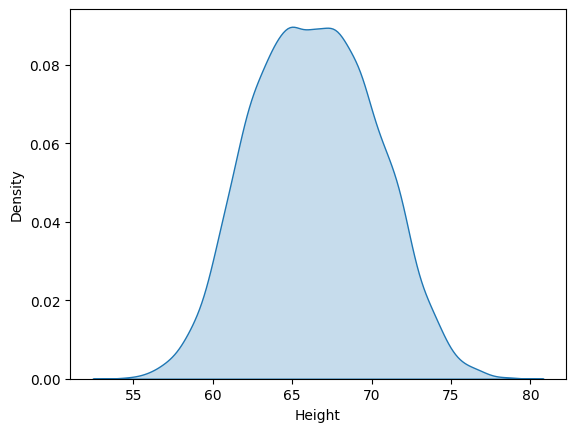

In [9]:
sns.kdeplot(df['Height'], fill=True)

<Axes: xlabel='Height'>

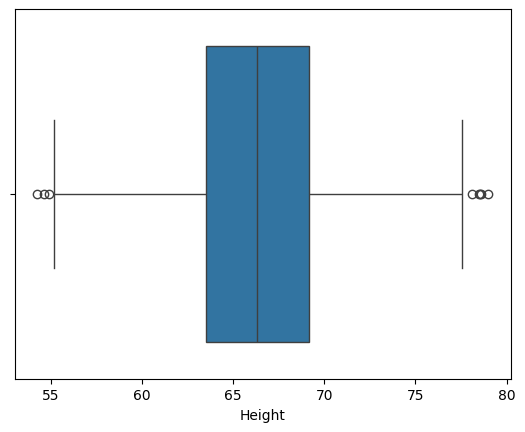

In [10]:
sns.boxplot(x=df['Height'])

In [11]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)
upper_limit, lower_limit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

In [14]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

In [15]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

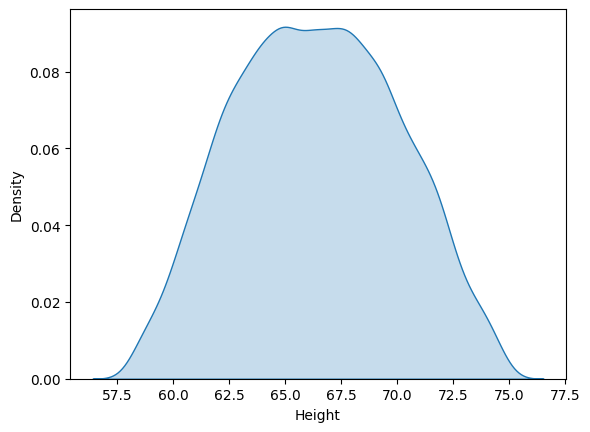

In [18]:
sns.kdeplot(new_df['Height'], fill=True)

<Axes: xlabel='Height'>

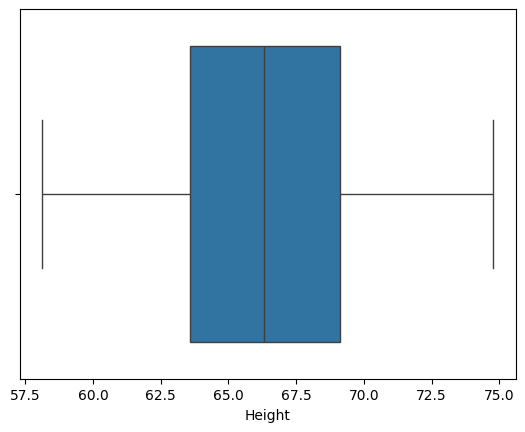

In [20]:
sns.boxplot(x=new_df['Height'])

### Capping

In [21]:
# capping --> Winzorization
df['Height'] = np.where(df['Height'] > upper_limit, upper_limit, np.where(df['Height']< lower_limit, lower_limit, df['Height']))

In [22]:
df.shape

(10000, 3)

In [23]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height'>

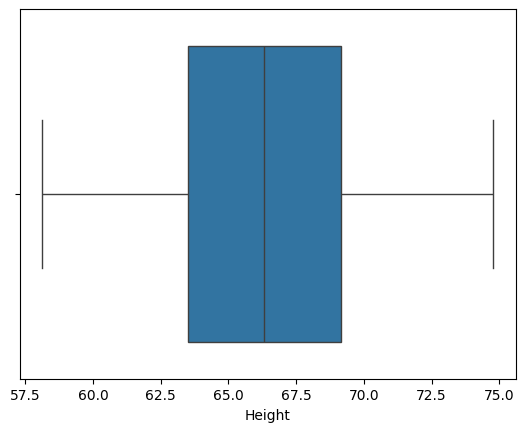

In [24]:
sns.boxplot(x=df['Height'])

<Axes: xlabel='Height', ylabel='Density'>

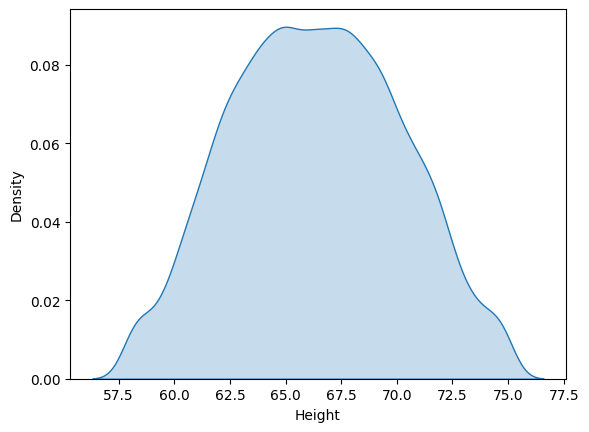

In [25]:
sns.kdeplot(df['Height'], fill=True)